# DIWALI SALES ANALYSIS

In [1]:
#IMPORT PYTHON LIBRARIES

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## TO DELETE BLANK/ UNRELATED COLUMNS

In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

## TO GET INFORMATION ABOUT COLUMNS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## TO CHECK NULL VALUES

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## TO DELETE NULL VALUES

In [9]:
df.dropna(inplace=True)

## TO CHANGE DATATYPES

In [11]:
df['Amount']=df['Amount'].astype('int')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## USING DESCRIBE() FUNTION

In [13]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## GENDER

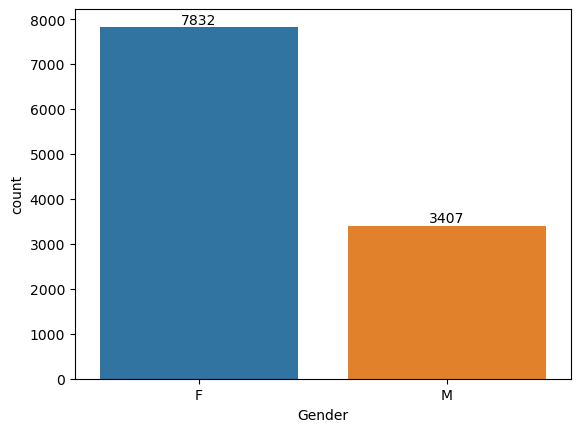

In [15]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

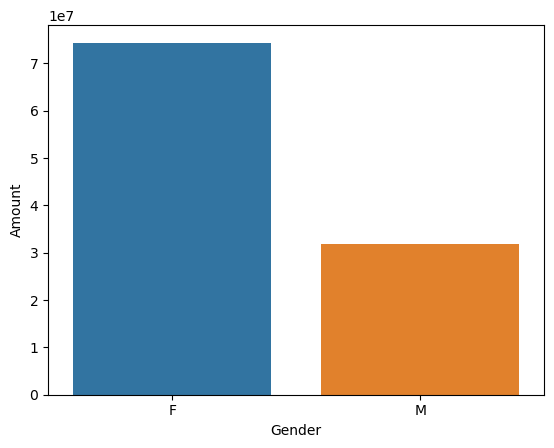

In [18]:
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender', y='Amount',data=sales_gen)

#### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

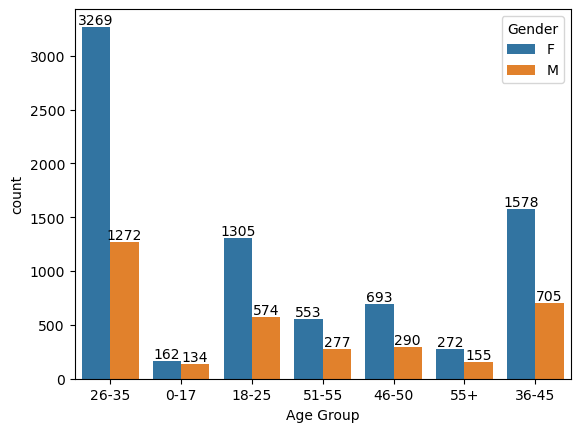

In [20]:
ax=sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in  ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

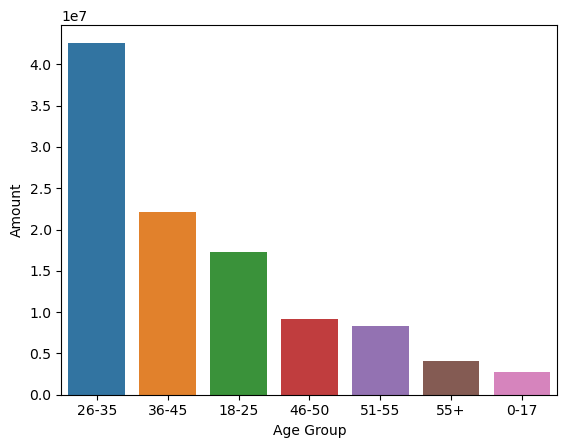

In [21]:
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group', y='Amount',data=sales_age)

#### From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

## STATE

<Axes: xlabel='State', ylabel='Orders'>

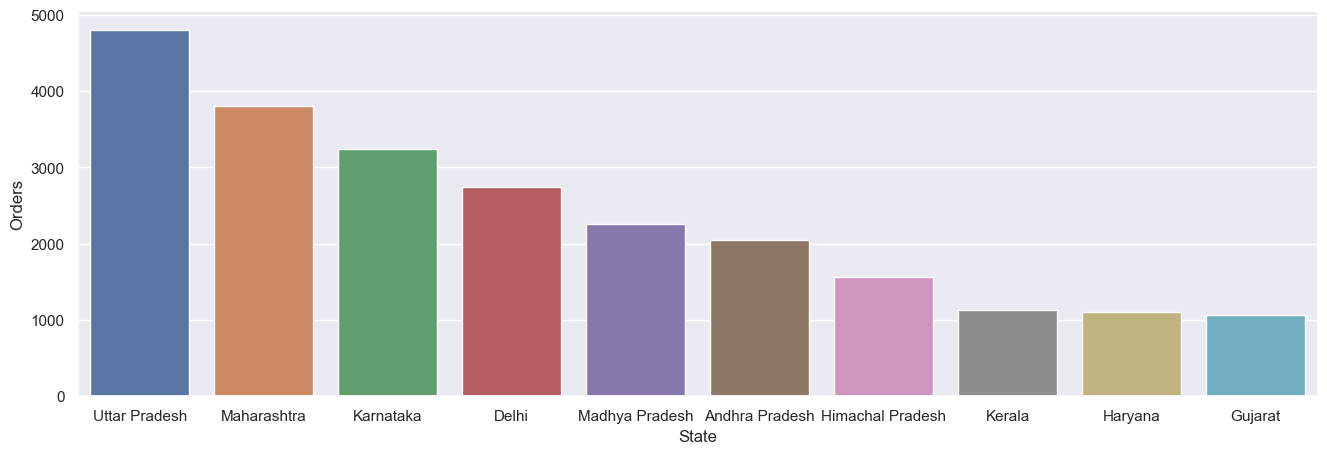

In [23]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state,x='State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

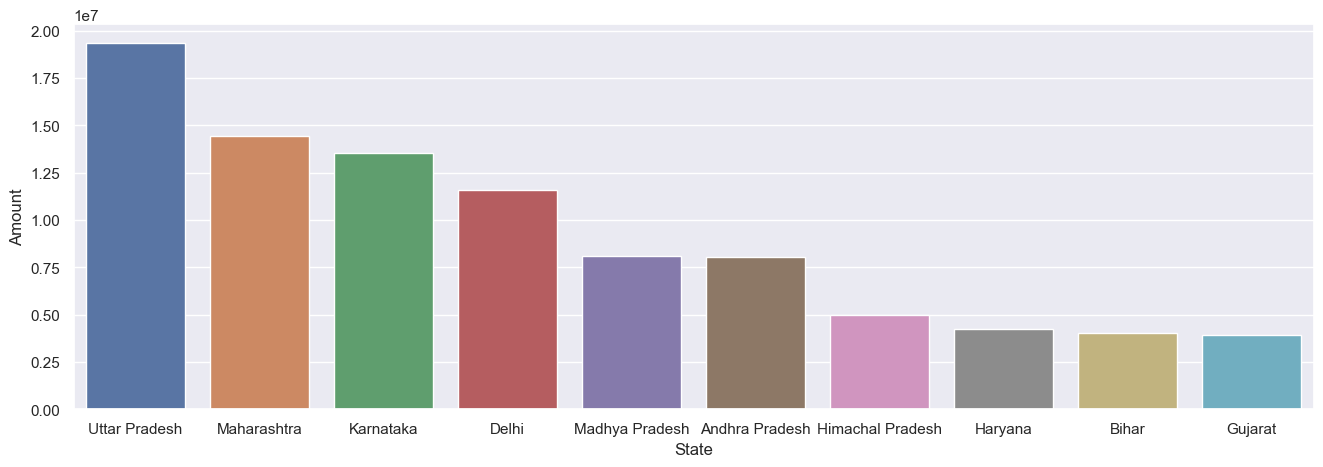

In [24]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state, x='State',y='Amount')

#### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## MARITAL_STATUS

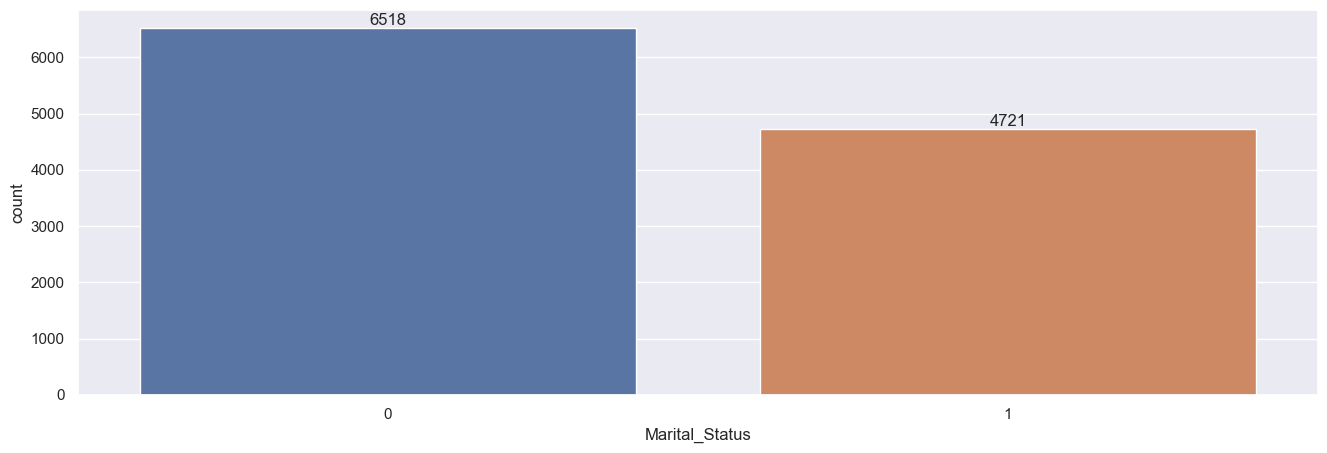

In [28]:
ax=sns.countplot(data=df,x='Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

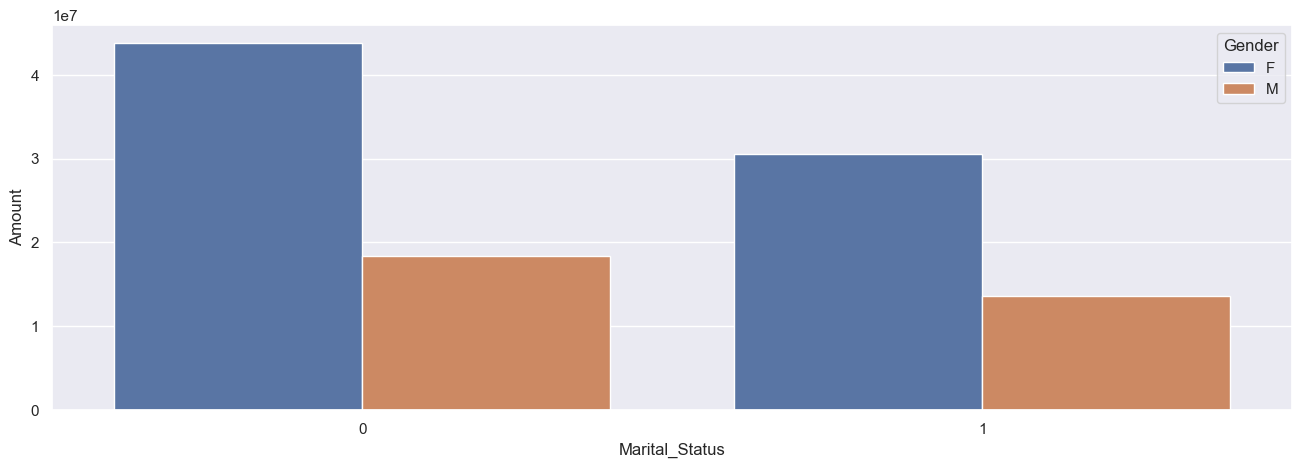

In [29]:
sales_state=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount',hue='Gender')

#### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## OCCUPATION

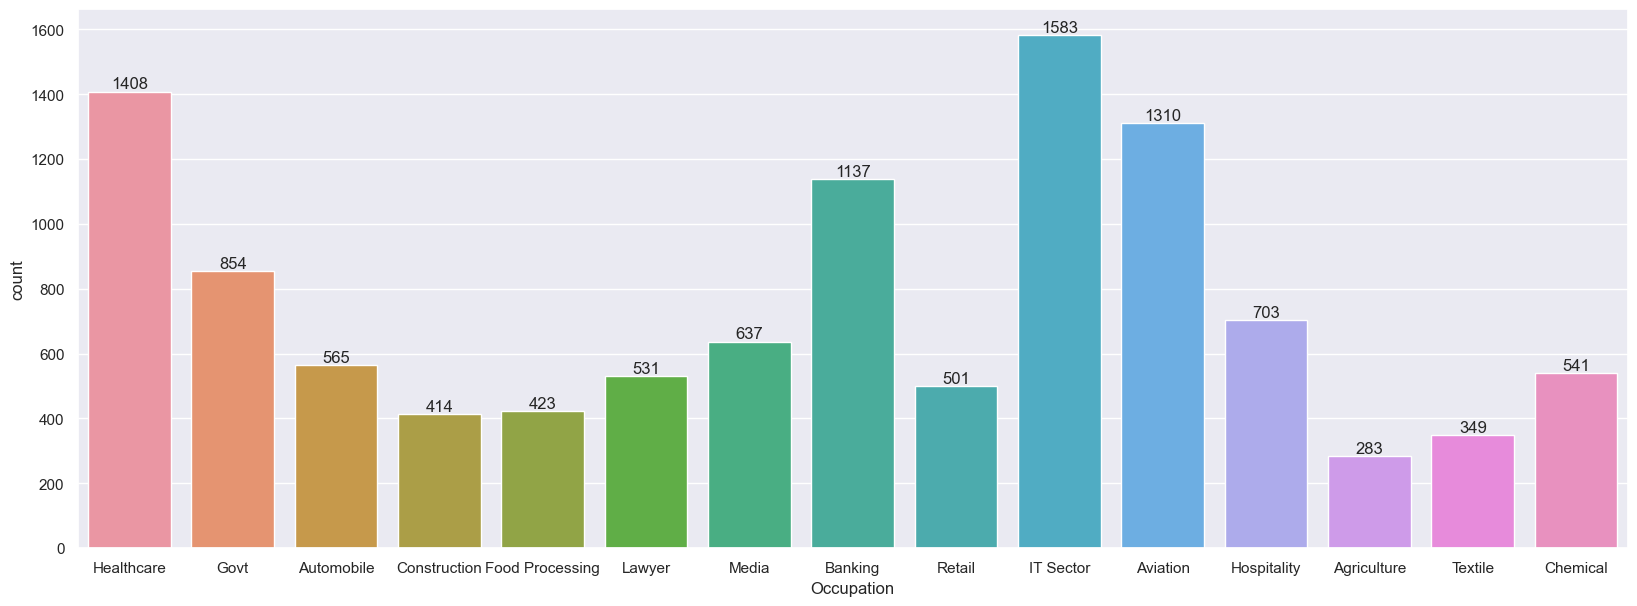

In [35]:
ax=sns.countplot(data=df,x='Occupation')

sns.set(rc={'figure.figsize':(16,8)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

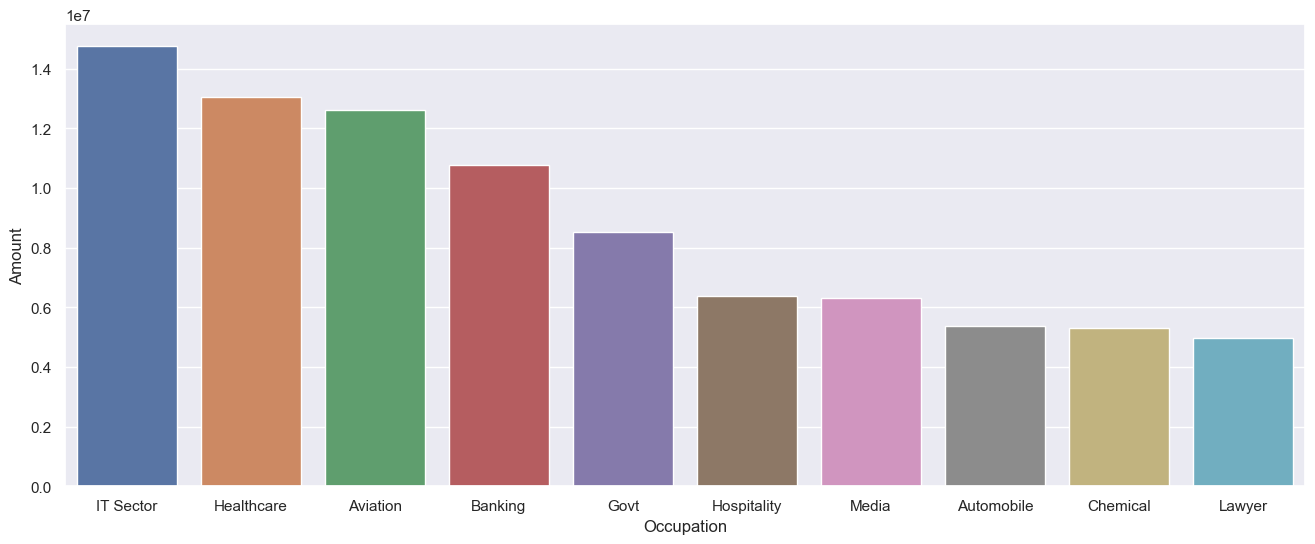

In [36]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

#### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## PRODUCT CATEGORY

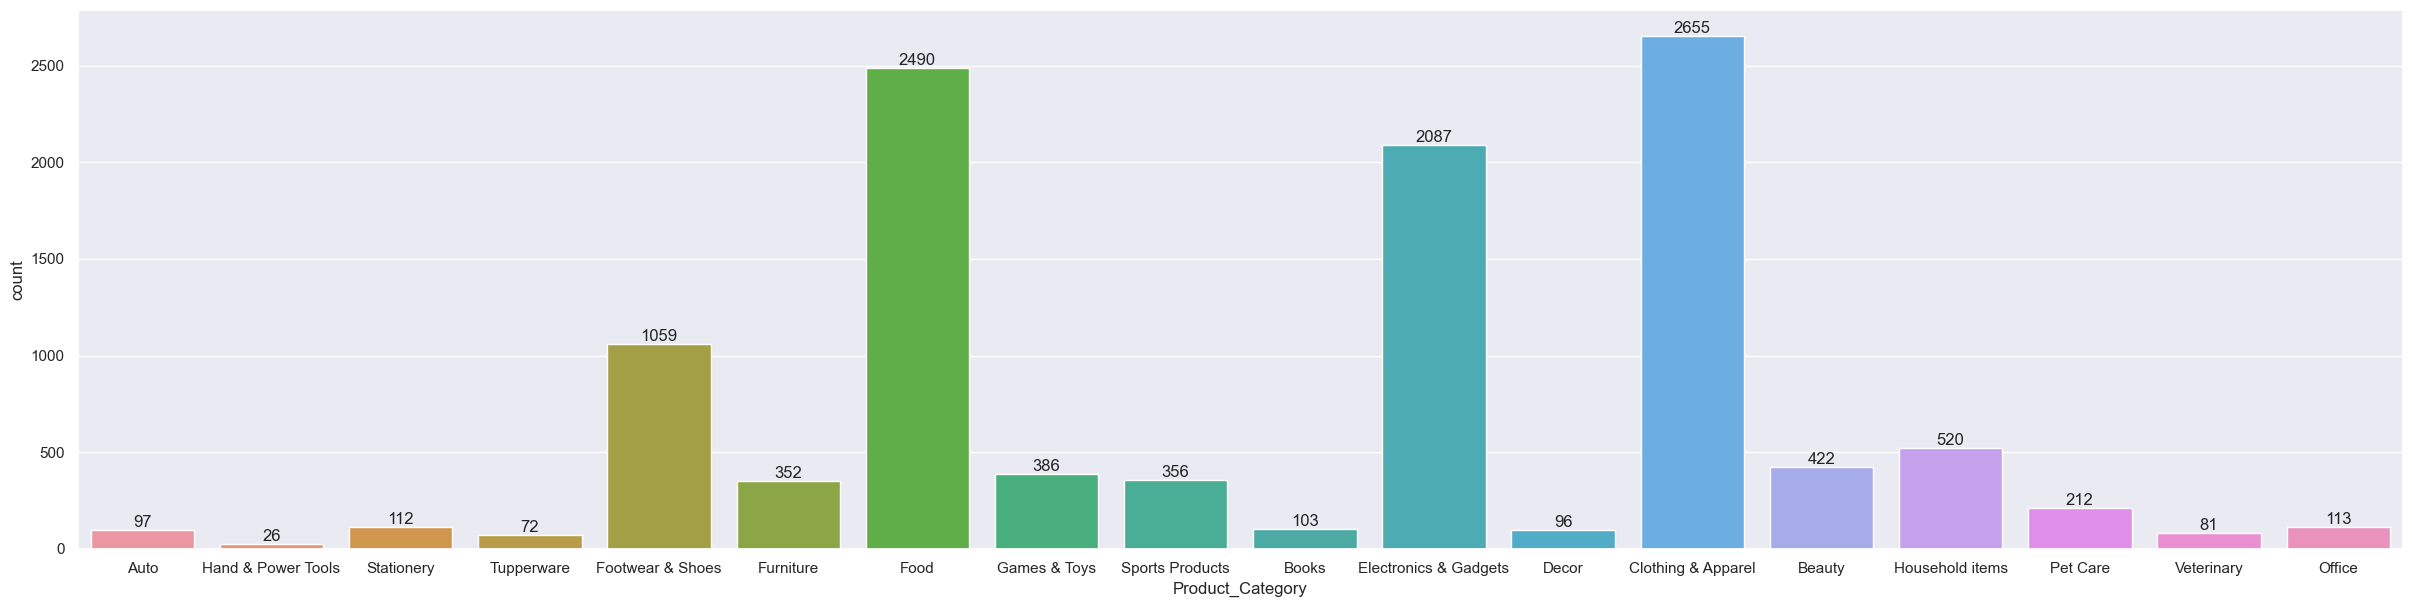

In [46]:
ax=sns.countplot(data=df,x='Product_Category')

sns.set(rc={'figure.figsize':(30,20)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

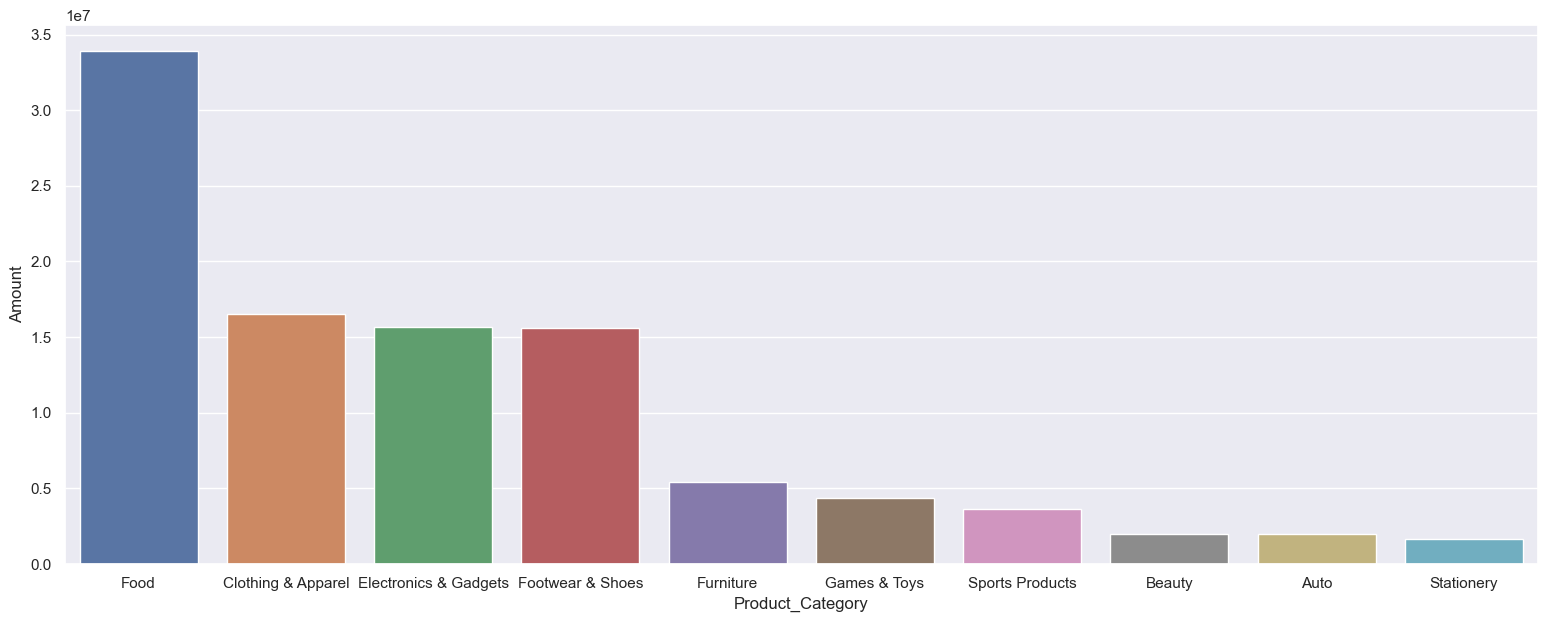

In [50]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,7)})
sns.barplot(data=sales_state, x='Product_Category', y ='Amount')

#### From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

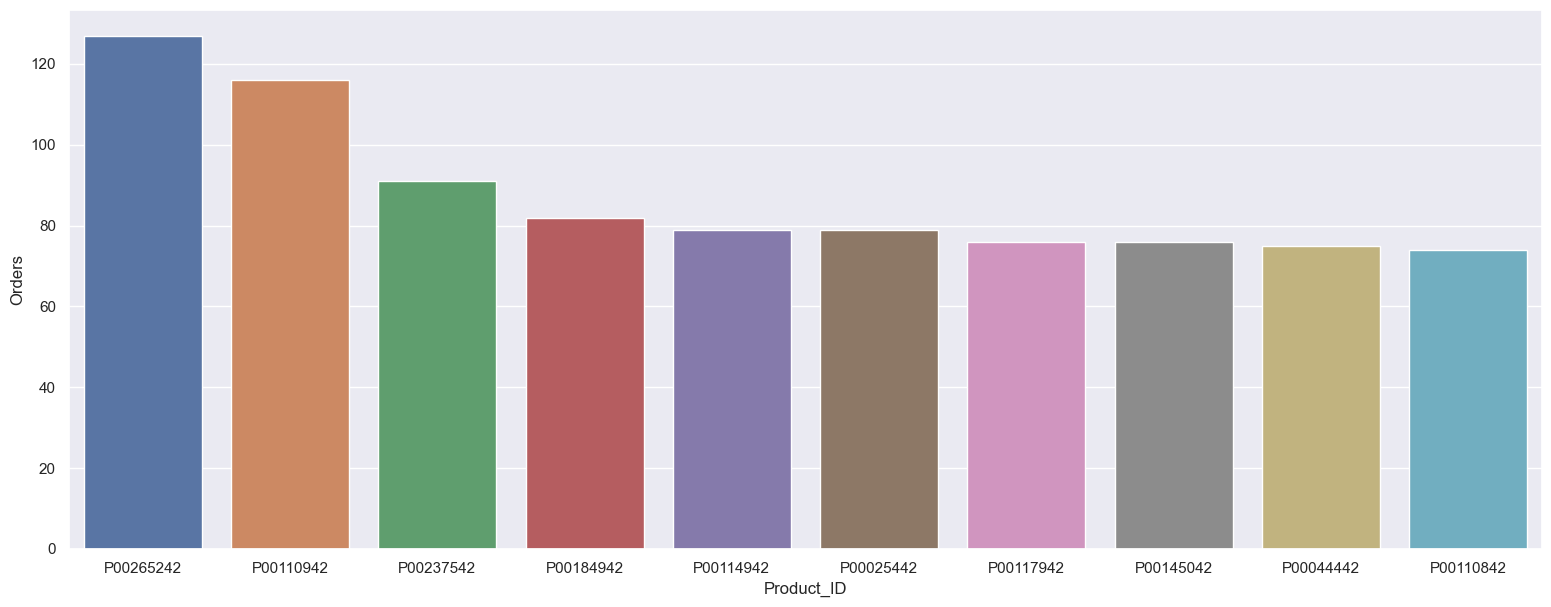

In [57]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,7)})
sns.barplot(data=sales_state, x='Product_ID', y ='Orders')

## CONCLUSION

#### Married Women age 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronic Category.

#### Complete Project on GitHub Link: https://github.com/DATAPREDICTS/DiwaliSales_Analysis
#### Check out my LinkedIn profile: www.linkedin.com/in/harshita-sharma-b68154220

## THANK YOU!